___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Predicting Target class with K Nearest Neighbors

Built a robust K-Nearest Neighbors predictive model using Scikit-learn to predict the target class in anonymised classification data.  I calculated errors for different k-values and identified an optimal k-value that resulted in the best model performance.

Libraries: Scikit-learn, Pandas, Matplotlib and Seaborn.


This project was done through Jose Portilla (Head of Data Science at Pierian Data) on Udemy (Python for Data Science and Machine Learning Bootcamp).

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
knn_data = pd.read_csv('KNN_Project_Data')

In [132]:
knn_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## EDA

#### Creating a pairplot with the hue indicated by the TARGET CLASS column.

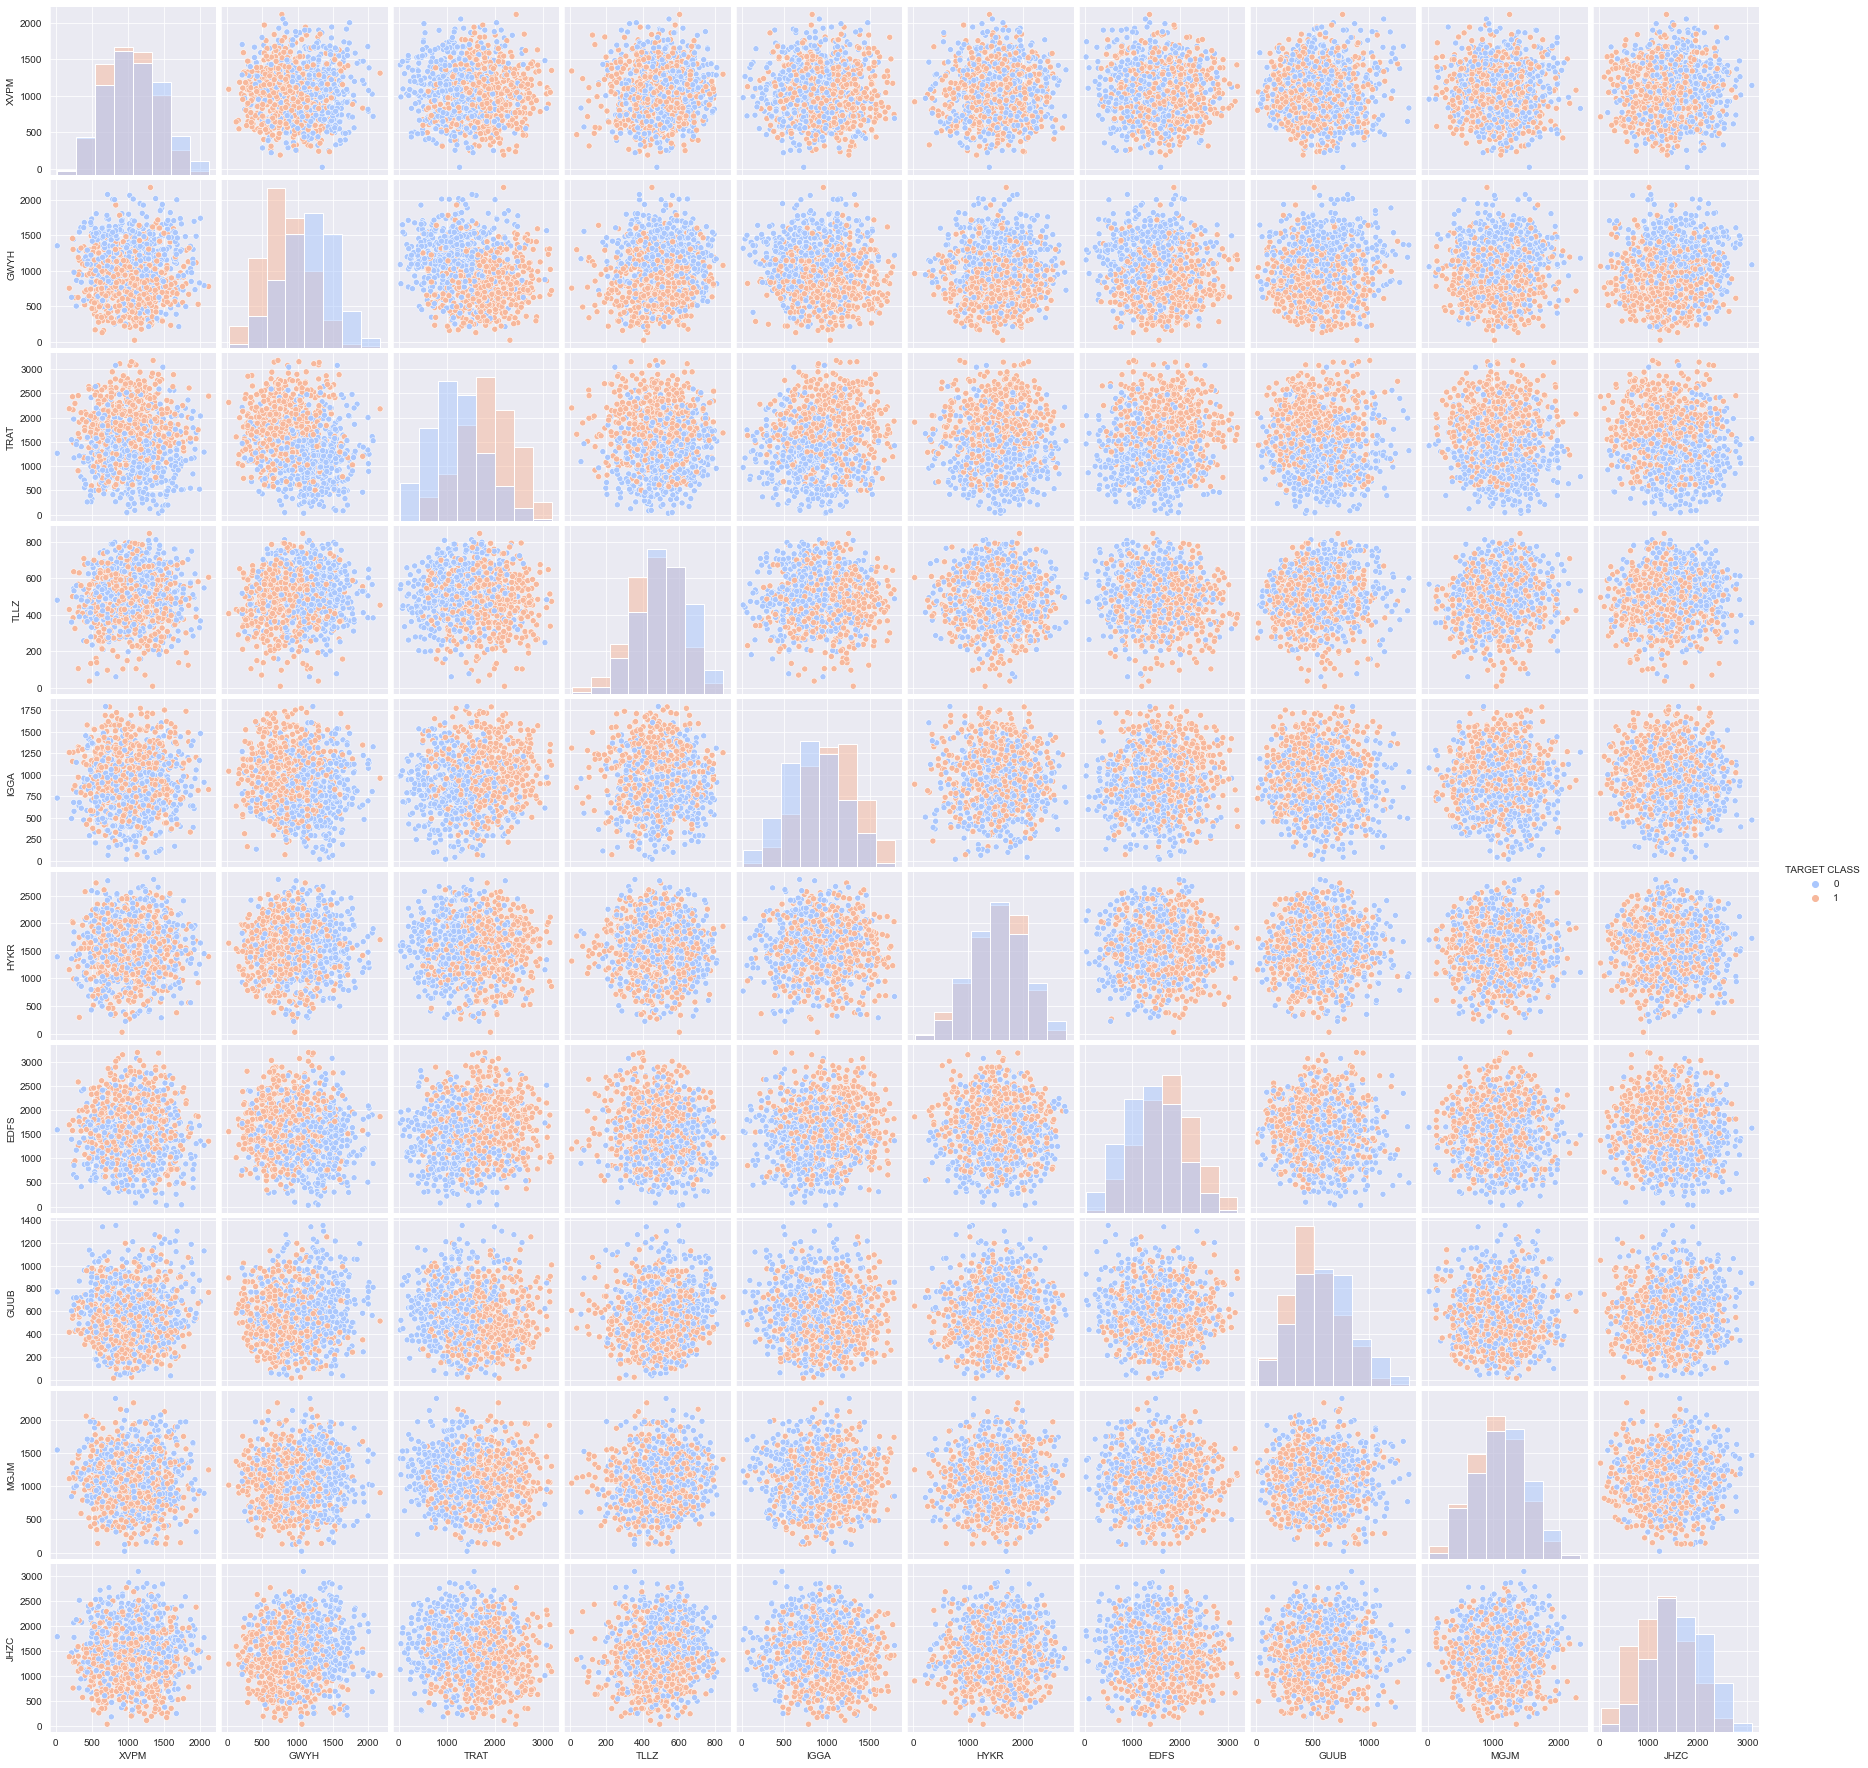

In [84]:
sns.set_style('darkgrid')
sns.set_palette('coolwarm')
sns.pairplot(data= knn_data, hue='TARGET CLASS', diag_kind = 'hist', palette ='coolwarm', diag_kws ={'bins':8})

## Standardize the Variables

#### Importing StandardScaler from Scikit learn.

In [1]:
from sklearn.preprocessing import StandardScaler

#### Creating a StandardScaler() object called scaler.

In [2]:
scaler = StandardScaler()

#### Fitting the scaler to the features.

In [3]:
knn_data.columns

NameError: name 'knn_data' is not defined

In [ ]:
scaler.fit(knn_data.drop('TARGET CLASS', axis =1))

#### Using the .transform() method to transform the features to a scaled version.

In [ ]:
scaled_features = scaler.transform(knn_data.drop('TARGET CLASS', axis =1))

#### Converting the scaled features to a dataframe.

In [89]:
knn_scaled = pd.DataFrame(scaled_features, columns= knn_data.columns[:-1])
knn_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

#### Using train_test_split to split the data into training and testing sets.

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, knn_data['TARGET CLASS'], test_size = 0.3)

## Using KNN

#### Importing KNeighborsClassifier from scikit learn.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

#### Creating a KNN model instance with n_neighbors=1

In [93]:
knn = KNeighborsClassifier(n_neighbors = 1)

#### Fitting the KNN model to the training data.

In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and Evaluating our model

#### Using the predict method to predict values using the KNN model and X_test.

In [95]:
pred = knn.predict(X_test)
pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1], d

#### Creating a confusion matrix and classification report.

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
print(confusion_matrix(y_test, pred))

[[ 99  50]
 [ 32 119]]


In [105]:
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,99,50,149
1,32,119,151
All,131,169,300


In [1]:
# The confusion matrix above shows that our model predicted 75.5% of the Target column entries correctly as 0 and 70% of the 
# target entries correctly as 1.  
# There are 99 true negatives (the 0's) and 32 false negatives.  119 entries are true positives (the 1's)and 50 are false 
# positives. 

In [106]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       149
           1       0.70      0.79      0.74       151

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [107]:
# From the classification report we can make the following deductions:
# The weighted average of the ratio of true positives to all positives is 73%
# The measure of our model to correctly identify true positives is 73%
# The precision of our model, i.e. the number of correct predictions to the total number of predictions, is 73%

## Choosing a K Value

Let's use the elbow method to pick a good K Value.

#### Creating a for loop that trains various KNN models with different k values.

In [108]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
# We are using only predictions which differ from the true values.

In [114]:
error_rate

[0.2733333333333333,
 0.23666666666666666,
 0.22,
 0.23333333333333334,
 0.20333333333333334,
 0.21666666666666667,
 0.19666666666666666,
 0.20666666666666667,
 0.18,
 0.19333333333333333,
 0.18,
 0.19333333333333333,
 0.18333333333333332,
 0.18666666666666668,
 0.18666666666666668,
 0.18666666666666668,
 0.18666666666666668,
 0.18333333333333332,
 0.18666666666666668,
 0.18333333333333332,
 0.18,
 0.17666666666666667,
 0.17,
 0.17,
 0.16333333333333333,
 0.17333333333333334,
 0.17,
 0.17666666666666667,
 0.17666666666666667,
 0.17333333333333334,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.17,
 0.16666666666666666,
 0.17666666666666667,
 0.17333333333333334,
 0.18333333333333332,
 0.17666666666666667,
 0.17666666666666667,
 0.18,
 0.17,
 0.17333333333333334,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.17333333333333334,
 0.17,
 0.16333333333333333,
 0.16333333333333333,
 0.16333333333333333,
 0.16,
 0.16333333333333333,
 0.16666666666666666,
 0.1633333333333

#### Creating a line plot to display the error rates:

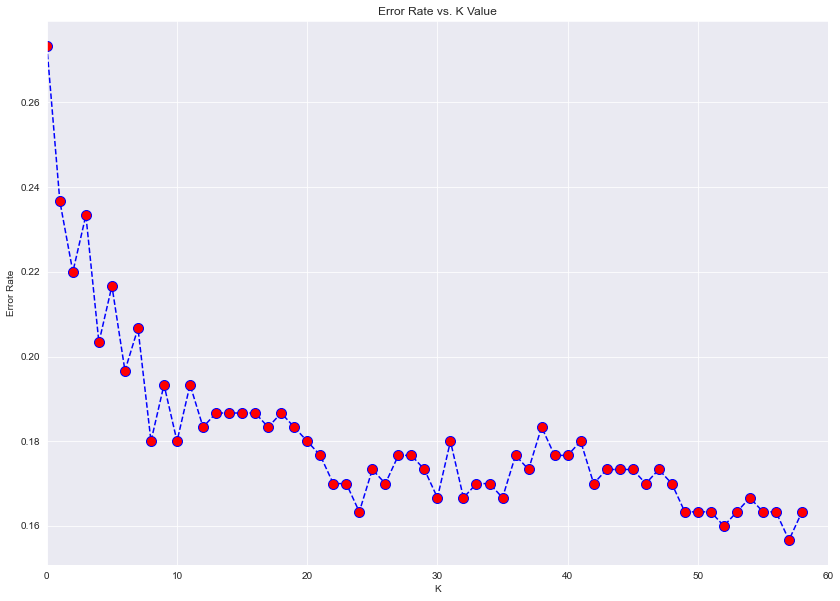

In [127]:
plt.figure(figsize=(14,10))
plt.plot(error_rate, color = 'blue', linestyle='--', marker= 'o', markerfacecolor = 'red', markersize = 10)
plt.xlim([0,60])
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

## Retraining the model with a new K Value

#### Retraining my model with the best K-value and re-doing the classification report and confusion matrix.

In [129]:
# For k = 52 we have  the 2nd lowest error rate.  Let us view the improvement in our model for k = 52:

knn = KNeighborsClassifier(n_neighbors=52)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=52')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=52


[[123  26]
 [ 23 128]]


              precision    recall  f1-score   support

           0       0.84      0.83      0.83       149
           1       0.83      0.85      0.84       151

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [124]:
# We can also use a smaller k-value for less bias in our outcome.  Using the KNN model with k = 33

knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=33


[[127  22]
 [ 28 123]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       149
           1       0.85      0.81      0.83       151

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [2]:
# With k = 33, the weighted averages of our precision, recall and accuracy scores are all 83%, which is a 10% imporvement 
# from the previous scores.
# This model will accurately make predictions on new data with about 83% accuracy.